# We will use the C++ library, SimpleKalmanFilter (https://github.com/denyssene/SimpleKalmanFilter).
However, our first round of data was only raw data. As such, we need a way to create what the device we do when
it implements the filter onto the data that's fed in.

Note that this also uses the SimpleKalmanFilter.h folder which initializes the initial estimates and gain to 0.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define Kalman and do example

In [24]:
class SimpleKalmanFilter:
    def __init__(self, mea_e, est_e, q):
        self._err_measure = mea_e
        self._err_estimate = est_e
        self._q = q
        self._last_estimate = 0
        self._current_estimate = 0
        self._kalman_gain = 0

    def updateEstimate(self, mea):
        self._kalman_gain = self._err_estimate / (self._err_estimate + self._err_measure)
        self._current_estimate = self._last_estimate + self._kalman_gain * (mea - self._last_estimate)
        self._err_estimate = (1.0 - self._kalman_gain) * self._err_estimate + abs(self._last_estimate - self._current_estimate) * self._q
        self._last_estimate = self._current_estimate

        return self._current_estimate

    def setMeasurementError(self, mea_e):
        self._err_measure = mea_e

    def setEstimateError(self, est_e):
        self._err_estimate = est_e

    def setProcessNoise(self, q):
        self._q = q

    def getKalmanGain(self):
        return self._kalman_gain

    def getEstimateError(self):
        return self._err_estimate


In [6]:
def kalman_filter(data: list[float], e_mea: float, e_est: float, q: float) -> list[float]:
    kf = SimpleKalmanFilter(e_mea, e_est, q)
    filtered_data = []
    for measurement in data:
        filtered_value = kf.updateEstimate(measurement)
        filtered_data.append(filtered_value)
    return filtered_data

In [25]:
# Test
data = [1.0, 2.0, 3.0, 4.0, 5.0]

e_mea = 1.0
e_est = 1.0
q = 0.01

# Filter the data using the Kalman filter and print the filtered values.
filtered_data = kalman_filter(data, e_mea, e_est, q)
# print(filtered_data)

# Update our data_trail_1
Looks good! Lets take in our data_trail_1. For trial_4, we used the following kalman filters on the data as defined below in the C++ Code below:
```
SimpleKalmanFilter kalman_x1(0.05, 0.05, 0.008);
SimpleKalmanFilter kalman_x2(.1, .1, 0.008);
SimpleKalmanFilter kalman_x3(.1, .1, 0.5);
SimpleKalmanFilter kalman_x4(1, 1, 0.05);
SimpleKalmanFilter kalman_x5(10, 10, 0.08);
```
The parameters are 
```
e_mea =  // Amount to expect in noise
e_est =  // Set to e_mea as described by https://github.com/denyssene/SimpleKalmanFilter
float q = //  usually a small number between 0.001 and 1 how fast your measurement moves. Recommended 0.01. Should be tunned to your needs. (I think for this is equivalent to 1)
```

In [29]:
#Load in data:
raw_df = pd.read_csv("./Data/data_trial_1.csv")
x_axis = raw_df.iloc[:,0] # We only care about the x_axis
x_axis = x_axis[1980:6075] # optional
data = x_axis.tolist()

In [34]:
#Define our set of parameters
params = [
    [0.05,0.05,0.008],
    [0.1,0.1,0.008],
    [0.1,0.1,0.5],
    [1,1,0.05],
    [10,10,0.08],
    [1,1,0.01]
] #different variations of e_mea, e_est, and q, see original arduino code for references
new_data = [] #stores our kalman filter values, index refers to the filter number as listed in description
for param_set in params:
    e_mea, e_est, q = param_set
    filtered_data = kalman_filter(data, e_mea, e_est, q)
    new_data.append(filtered_data)



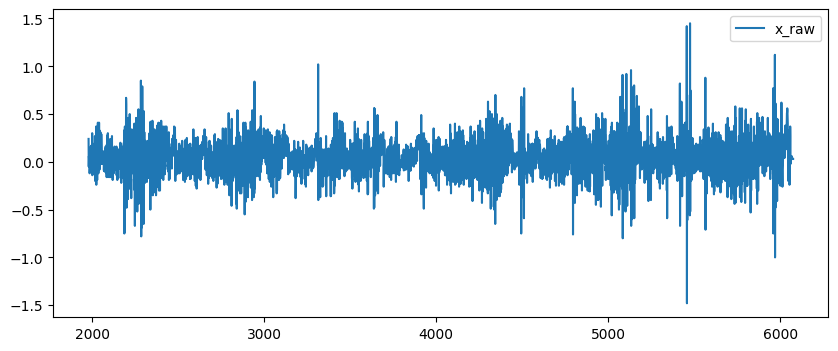

In [37]:
# Plot our results
#size
plt.figure(figsize=(10,4))


# plt.plot(data, label = "x_raw")
# plt.plot(new_data[0], label = "kal_1")
# plt.plot(new_data[1], label = "kal_2")
# plt.plot(new_data[2], label = "kal_3")
# plt.plot(new_data[3], label = "kal_4")
# plt.plot(new_data[4], label = "kal_5")
# plt.plot(new_data[5], label = "kal_original")




plt.legend()
plt.show()
